02_ML_WS_02_(titanic)

### Import

In [185]:
import pandas as pd
import numpy as np
import random as rnd
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import matplotlib
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import zscore

import pyforest
import pickle
import sqlite3

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR, LinearSVR, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white") # https://www.codecademy.com/article/seaborn-design-i

### Data

In [186]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")
combine = [train_df, test_df]

In [187]:
df = pd.concat([train_df, test_df], axis=0)
df.reset_index(drop=True, inplace=True)

### Data Info

In [188]:
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)
print("df shape:", df.shape)

train_df shape: (356, 12)
test_df shape: (89, 12)
df shape: (445, 12)


In [189]:
df.shape

(445, 12)

In [190]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [191]:
df.duplicated().sum()

0

In [192]:
train_df.head(2)
# Categoric: Survived, Sex, Embarked   
# Ordinal  : Pclass
# Numeric  : Age, Fare 
# Discrete : SibSp, Parch 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
1,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.000,NaN,S


In [193]:
train_df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
354,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
355,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S


In [194]:
train_df.info()
print("_"*40)
print(" ")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  356 non-null    int64  
 1   Survived     356 non-null    int64  
 2   Pclass       356 non-null    int64  
 3   Name         356 non-null    object 
 4   Sex          356 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        356 non-null    int64  
 7   Parch        356 non-null    int64  
 8   Ticket       356 non-null    object 
 9   Fare         356 non-null    float64
 10  Cabin        83 non-null     object 
 11  Embarked     356 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 33.5+ KB
________________________________________
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [195]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,356.000000,356.000000,356.000000,290.000000,356.000000,356.000000,356.000000
mean,451.713483,0.384831,2.300562,29.123862,0.550562,0.412921,31.657970
std,260.505039,0.487240,0.833861,14.103122,1.120978,0.798415,43.474154
min,7.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,229.750000,0.000000,2.000000,19.000000,0.000000,0.000000,7.925000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.245800
75%,686.750000,1.000000,3.000000,37.000000,1.000000,1.000000,31.275000
max,890.000000,1.000000,3.000000,71.000000,8.000000,6.000000,263.000000


In [196]:
# Real Total Passenger 2224 but we get here 891 

In [197]:
for column in df.select_dtypes("object").columns:
    print(f"Column {column} has {df[column].nunique()} unique values.")

Column Name has 445 unique values.
Column Sex has 2 unique values.
Column Ticket has 366 unique values.
Column Cabin has 81 unique values.
Column Embarked has 3 unique values.


In [198]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,356,356,356,83,356
unique,356,2,302,67,3
top,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",male,CA 2144,C23 C25 C27,S
freq,1,225,4,4,266


In [199]:
def quick_report(Column):
    percentage = "{:.2%}".format(df[Column].isna().sum()/len(df[Column])) 
    print("per_of_nulls :", percentage)

    nulls = df[Column].isna().sum()
    print("num_of_nulls :", nulls)

    uniqueValues = df[Column].nunique()
    print("num_of_uniques   :", uniqueValues, "/" ,len(df[Column]))
    print("")

    items = df[Column].value_counts(dropna=False).head(10)

    print(df[Column].describe())
    print("")

In [200]:
for col in df.columns:
    print("*"*90)
    print(col)
    quick_report(col)

******************************************************************************************
PassengerId
per_of_nulls : 0.00%
num_of_nulls : 0
num_of_uniques   : 445 / 445

count    445.000000
mean     446.274157
std      259.362344
min        2.000000
25%      220.000000
50%      439.000000
75%      670.000000
max      890.000000
Name: PassengerId, dtype: float64

******************************************************************************************
Survived
per_of_nulls : 0.00%
num_of_nulls : 0
num_of_uniques   : 2 / 445

count    445.00000
mean       0.38427
std        0.48697
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: Survived, dtype: float64

******************************************************************************************
Pclass
per_of_nulls : 0.00%
num_of_nulls : 0
num_of_uniques   : 3 / 445

count    445.000000
mean       2.312360
std        0.832317
min        1.000000
25%        2.000000
50%        3.000000


### Survived & Features (groupby) Mean

In [201]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


In [202]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.639535
1,2,0.480519
2,3,0.233161


In [203]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.709924
1,male,0.195556


In [204]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.529412
2,2,0.444444
0,0,0.350000
3,3,0.333333
4,4,0.181818
5,5,0.000000
6,8,0.000000


In [205]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
2,2,0.600000
1,1,0.500000
0,0,0.335878
3,3,0.000000
4,4,0.000000
5,6,0.000000


### Visualize Data

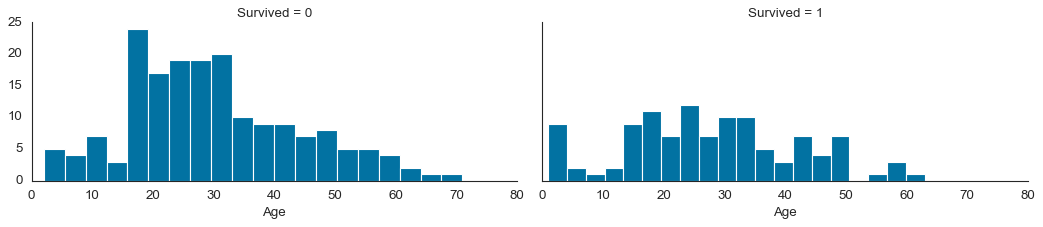

In [206]:
g = sns.FacetGrid(train_df, col="Survived", size=3, aspect=2.2)
g.map(plt.hist, "Age", bins=20)

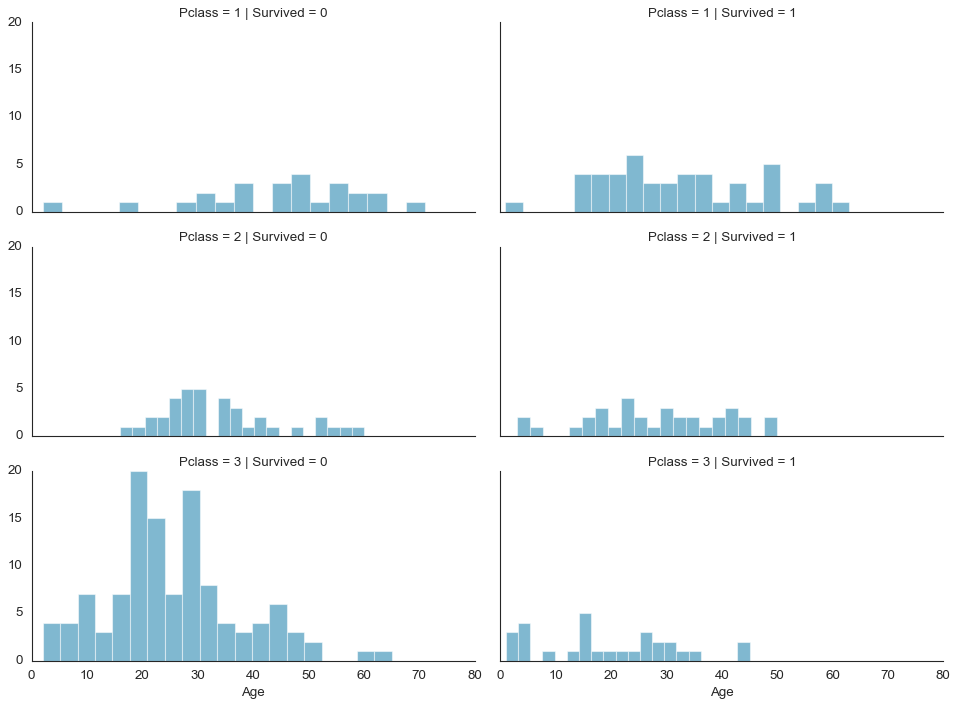

In [207]:
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", size=3, aspect=2)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend();

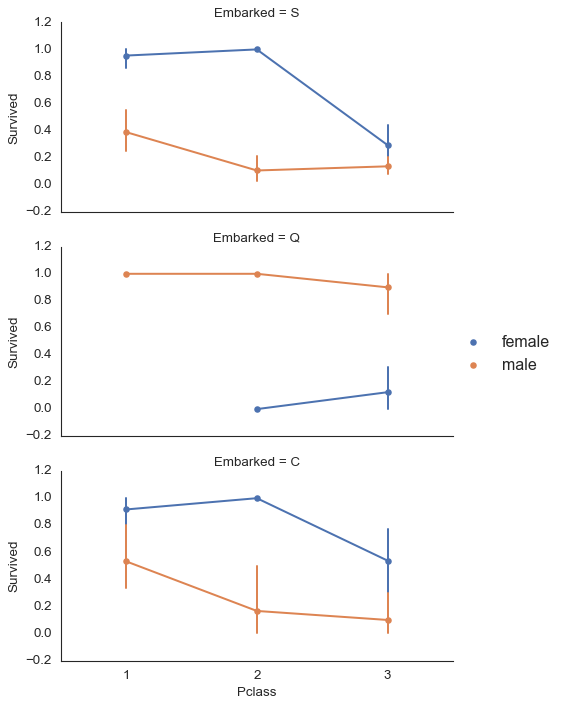

In [208]:
grid = sns.FacetGrid(train_df, row="Embarked", size=3, aspect=2)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette = "deep")
grid.add_legend();

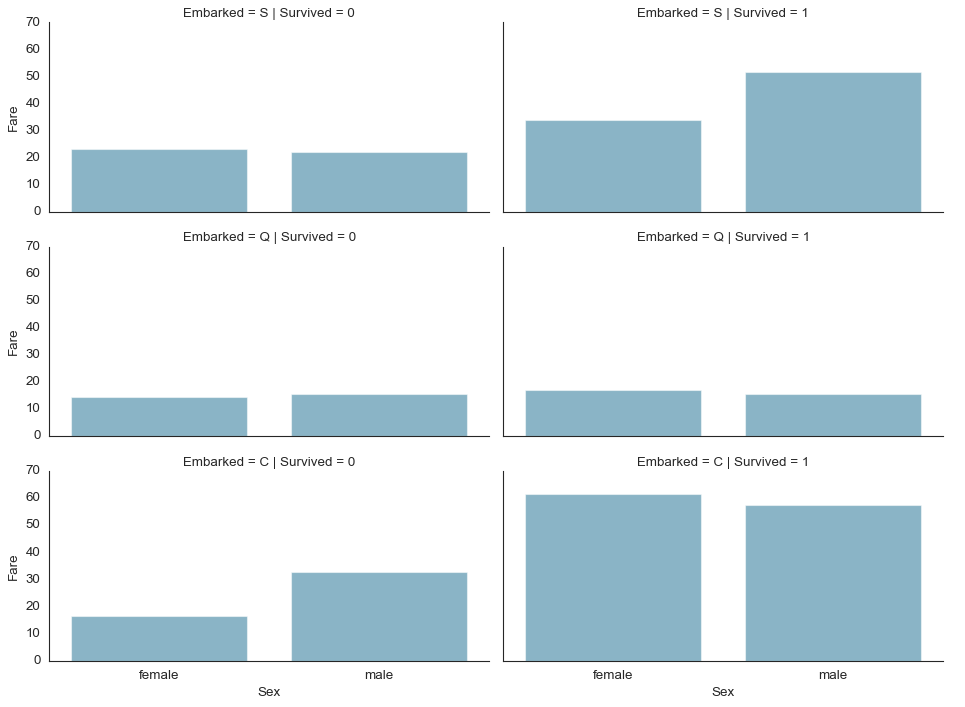

In [209]:
grid = sns.FacetGrid(train_df, col="Survived", row="Embarked", size=3, aspect=2)
grid.map(sns.barplot, "Sex", "Fare", alpha=0.5, ci=None)
grid.add_legend();

### Wrangle Data

In [210]:
df.shape

(445, 12)

In [211]:
print("Before\t:", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(["Ticket","Cabin"], axis=1)
test_df = test_df.drop(["Ticket","Cabin"], axis=1)
combine = [train_df, test_df]

print("After\t:", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before	: (356, 12) (89, 12) (356, 12) (89, 12)
After	: (356, 10) (89, 10) (356, 10) (89, 10)


In [212]:
df.Name.sample(10)

124    Myhrman, Mr. Pehr Fabian Oliver Malkolm
73                           Coxon, Mr. Daniel
101                   Lobb, Mr. William Arthur
386                           Dimic, Mr. Jovan
314            Sandstrom, Miss. Marguerite Rut
304                        Robbins, Mr. Victor
210             Goodwin, Master. Harold Victor
293                         Harris, Mr. Walter
9                   Berriman, Mr. William John
116           Flynn, Mr. John Irwin ("Irving")
Name: Name, dtype: object

In [213]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract("([A-Za-z]+)\.", expand=False)
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Col,0,1
Countess,1,0
Dr,1,2
Major,0,1
Master,0,16
Miss,81,0
Mr,0,201
Mrs,48,0
Rev,0,3


In [214]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady","Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle","Miss")
    dataset["Title"] = dataset["Title"].replace("Ms","Miss") 
    dataset["Title"] = dataset["Title"].replace("Mme","Mrs")
train_df[["Title","Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.437500
1,Miss,0.679012
2,Mr,0.179104
3,Mrs,0.750000
4,Rare,0.300000


In [215]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.075,S,3
1,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,26.000,S,1
2,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,21.075,S,2
3,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,8.050,S,1
4,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,13.000,S,3


In [216]:
train_df = train_df.drop(["Name","PassengerId"], axis=1)
test_df = test_df.drop(["Name","PassengerId"], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((356, 9), (89, 9))

In [217]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":1, "male":0}).astype(int)
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,29.0,0,4,21.075,S,3
1,1,2,0,32.0,1,0,26.000,S,1


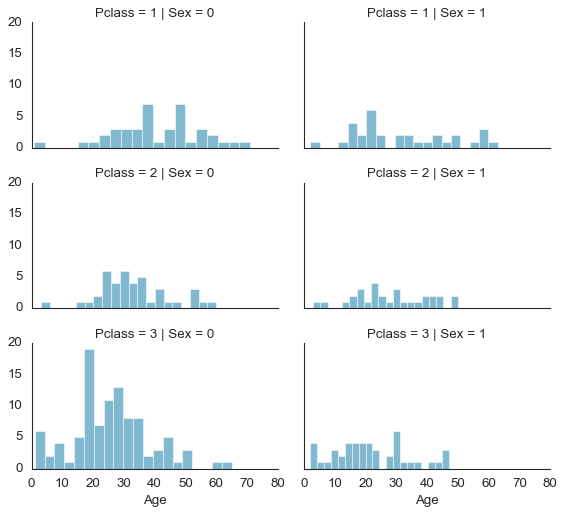

In [218]:
grid = sns.FacetGrid(train_df, col="Sex", row="Pclass", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend();

In [219]:
df[df["Age"].isnull()].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
12,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C


In [220]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [221]:
df.Age.isnull().sum()

89

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

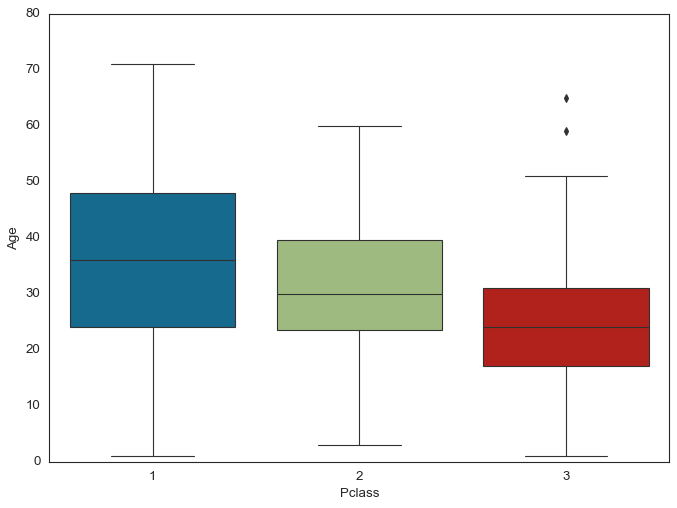

In [222]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=train_df)

In [223]:
train_df[train_df["Pclass"]==1].Age.median()

36.0

In [224]:
train_df[train_df["Pclass"]==2].Age.median()

30.0

In [225]:
train_df[train_df["Pclass"]==3].Age.median()

24.0

In [226]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [227]:
train_df["Age"] = train_df[["Age","Pclass"]].apply(impute_age, axis=1)

In [228]:
train_df.Age.isnull().sum()

0

In [229]:
test_df["Age"] = test_df[["Age","Pclass"]].apply(impute_age, axis=1)

In [230]:
test_df.Age.isnull().sum()

0

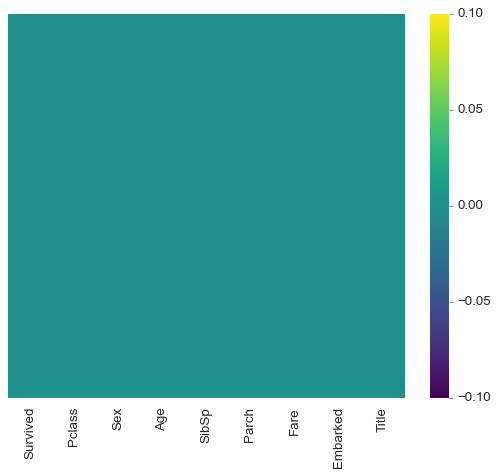

In [231]:
sns.heatmap(train_df.isnull(), yticklabels=False, cmap="viridis");

In [232]:
train_df.Embarked.isnull().sum()

0

In [233]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [234]:
train_df.shape

(356, 9)

In [235]:
train_df.dropna(subset=["Embarked"], how="all", inplace=True)

In [236]:
train_df.Embarked.isnull().sum()

0

In [237]:
train_df.shape

(356, 9)

In [238]:
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)

,AgeBand,Survived
0,"(0.85, 14.936]",0.441176
1,"(14.936, 28.952]",0.369697
2,"(28.952, 42.968]",0.411765
3,"(42.968, 56.984]",0.357143
4,"(56.984, 71.0]",0.307692


In [239]:
for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1.0,0,4,21.075,S,3,"(28.952, 42.968]"
1,1,2,0,1.0,1,0,26.000,S,1,"(28.952, 42.968]"
2,0,3,1,0.0,3,1,21.075,S,2,"(0.85, 14.936]"
3,0,3,0,2.0,0,0,8.050,S,1,"(42.968, 56.984]"
4,1,2,1,2.0,0,0,13.000,S,3,"(28.952, 42.968]"


In [240]:
train_df = train_df.drop(["AgeBand"], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,0,4,21.075,S,3
1,1,2,0,1.0,1,0,26.000,S,1
2,0,3,1,0.0,3,1,21.075,S,2
3,0,3,0,2.0,0,0,8.050,S,1
4,1,2,1,2.0,0,0,13.000,S,3


In [241]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
train_df[["FamilySize","Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.750000
1,2,0.596774
2,3,0.543478
6,7,0.333333
0,1,0.291866
5,6,0.222222
4,5,0.166667
7,8,0.000000
8,11,0.000000


In [242]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.517007
1,1,0.291866


In [243]:
train_df = train_df.drop(["Parch","SibSp","FamilySize"], axis=1)
test_df = test_df.drop(["Parch","SibSp","FamilySize"], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1.0,21.075,S,3,0
1,1,2,0,1.0,26.000,S,1,0
2,0,3,1,0.0,21.075,S,2,0
3,0,3,0,2.0,8.050,S,1,1
4,1,2,1,2.0,13.000,S,3,1


In [244]:
for dataset in combine:
    dataset["Age*Class"] = dataset.Age * dataset.Pclass
train_df.loc[:, ["Age*Class","Age","Pclass"]].head()

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,1.0,2
2,0.0,0.0,3
3,6.0,2.0,3
4,4.0,2.0,2


In [245]:
train_df.Embarked.value_counts()

S    266
C     61
Q     29
Name: Embarked, dtype: int64

In [246]:
for dataset in combine:
    dataset.loc[dataset["Embarked"] == "S", "Embarked"] = 0
    dataset.loc[dataset["Embarked"] == "C", "Embarked"] = 1
    dataset.loc[dataset["Embarked"] == "Q", "Embarked"] = 2
    dataset["Embarked"] = dataset["Embarked"].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1.0,21.075,0,3,0,3.0
1,1,2,0,1.0,26.000,0,1,0,2.0
2,0,3,1,0.0,21.075,0,2,0,0.0
3,0,3,0,2.0,8.050,0,1,1,6.0
4,1,2,1,2.0,13.000,0,3,1,4.0


In [247]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)
test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,1,1,2.0,135.6333,0,2,1,2.0
1,1,3,1,0.0,8.0292,2,2,1,0.0
2,0,3,0,1.0,56.4958,0,1,1,3.0
3,0,3,1,1.0,7.8542,0,2,1,3.0
4,1,3,1,1.0,22.3583,1,2,0,3.0


In [248]:
train_df["FareBand"] = pd.qcut(train_df["Fare"], 4)
train_df[["FareBand","Survived"]].groupby(["FareBand"], as_index=False).mean().sort_values(by="FareBand", ascending=True)

,FareBand,Survived
0,"(-0.001, 7.925]",0.215054
1,"(7.925, 15.246]",0.290698
2,"(15.246, 31.275]",0.449438
3,"(31.275, 263.0]",0.590909


In [249]:
for dataset in combine:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

train_df = train_df.drop(["FareBand"], axis=1)
combine = [train_df, test_df]

### Machine Learning Models

In [250]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1.0,2,0,3,0,3.0
1,1,2,0,1.0,2,0,1,0,2.0
2,0,3,1,0.0,2,0,2,0,0.0
3,0,3,0,2.0,1,0,1,1,6.0
4,1,2,1,2.0,1,0,3,1,4.0


In [251]:
test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,1,1,2.0,3,0,2,1,2.0
1,1,3,1,0.0,1,2,2,1,0.0
2,0,3,0,1.0,3,0,1,1,3.0
3,0,3,1,1.0,0,0,2,1,3.0
4,1,3,1,1.0,2,1,2,0,3.0


In [252]:
x_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

x_test = test_df.drop("Survived", axis=1)
y_test = test_df["Survived"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((356, 8), (356,), (89, 8), (89,))

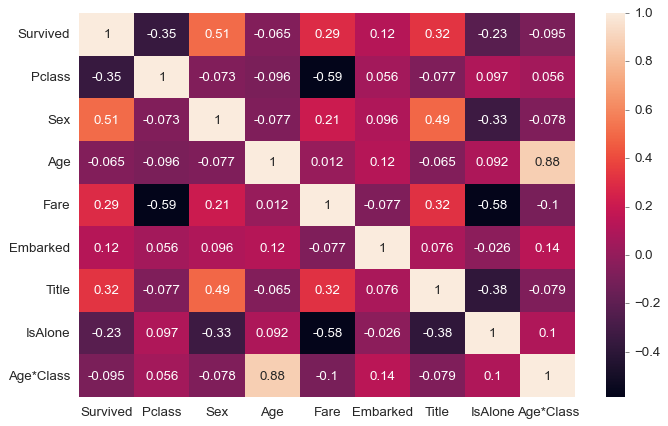

In [253]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True);

<AxesSubplot:>

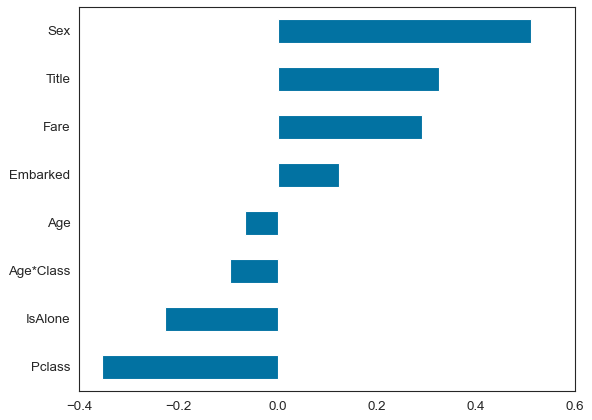

In [254]:
train_df.corr()["Survived"].drop("Survived").sort_values().plot.barh()

### Score def Func

In [255]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

### LogisticRegression

In [256]:
log_model = LogisticRegression()

log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)
y_pred_proba = log_model.predict_proba(x_test)
y_pred_train = log_model.predict(x_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ls = train_val(y_train, y_pred_train, y_test, y_pred)
ls.rename(columns = {'train_set' : 'ls_train', 'test_set' : 'ls_test'}, inplace = True)
ls

[[47  8]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        55
           1       0.77      0.79      0.78        34

    accuracy                           0.83        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.83      0.83      0.83        89



,ls_train,ls_test
Accuracy,0.823034,0.831461
Precision,0.793651,0.771429
Recall,0.729927,0.794118
f1,0.760456,0.782609


### LogisticRegression & CV

In [257]:
log_cv_model = LogisticRegression()

scores = cross_validate(log_cv_model,
                        x_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision_weighted',
                                   'recall_weighted',
                                   'f1_weighted'],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.800556
test_precision_weighted    0.805311
test_recall_weighted       0.800556
test_f1_weighted           0.798281
dtype: float64

### LogisticRegression & GridSearchCV

In [258]:
log_grid_model = LogisticRegression(solver='saga', multi_class="ovr", max_iter=5000)

In [259]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 5)
C = np.logspace(0, 10, 5)

param_grid = {"penalty" : penalty, "l1_ratio" : l1_ratio, "C" : C}

In [260]:
log_grid_model = GridSearchCV(log_grid_model, param_grid = param_grid)

In [261]:
log_grid_model.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [262]:
log_grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [263]:
log_grid_model = LogisticRegression(C=1,
                                    l1_ratio=0,
                                    penalty="l1",
                                    solver='saga',
                                    multi_class="ovr",
                                    max_iter=100000)

log_grid_model.fit(x_train, y_train)

y_pred = log_grid_model.predict(x_test)
y_pred_proba = log_grid_model.predict_proba(x_test)
y_pred_train = log_grid_model.predict(x_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

lsgrid = train_val(y_train, y_pred_train, y_test, y_pred)
lsgrid.rename(columns = {'train_set' : 'lsgrid_train', 'test_set' : 'lsgrid_test'}, inplace = True)
lsgrid

[[48  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        55
           1       0.79      0.79      0.79        34

    accuracy                           0.84        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.84      0.84      0.84        89



,lsgrid_train,lsgrid_test
Accuracy,0.808989,0.842697
Precision,0.785124,0.794118
Recall,0.693431,0.794118
f1,0.736434,0.794118


### SVC

In [264]:
svc_model = SVC()

svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

svcs = train_val(y_train, y_pred_train, y_test, y_pred)
svcs.rename(columns = {'train_set' : 'svcs_train', 'test_set' : 'svcs_test'}, inplace = True)
svcs

[[47  8]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        55
           1       0.77      0.79      0.78        34

    accuracy                           0.83        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.83      0.83      0.83        89



,svcs_train,svcs_test
Accuracy,0.808989,0.831461
Precision,0.785124,0.771429
Recall,0.693431,0.794118
f1,0.736434,0.782609


### SVC & CV

In [265]:
svc_cv_model = SVC()
scores = cross_validate(svc_cv_model,
                        x_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                   'recall',
                                   'f1'],
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.753016
test_precision    0.715190
test_recall       0.634066
test_f1           0.664878
dtype: float64

### SVC & GridSearchCV

In [266]:
svc_grid_model = SVC()

In [267]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

In [268]:
svc_grid_model = GridSearchCV(svc_grid_model, param_grid, verbose=3, refit=True)

In [269]:
svc_grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.611 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.620 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.676 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.681 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.732 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.761 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.845 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.764 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [270]:
svc_grid_model.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [271]:
svc_grid_model = SVC(C=100, gamma=0.01, kernel="rbf")

svc_grid_model.fit(x_train, y_train)

y_pred = svc_grid_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

svcsgrid = train_val(y_train, y_pred_train, y_test, y_pred)
svcsgrid.rename(columns = {'train_set' : 'svcsgrid_train', 'test_set' : 'svcsgrid_test'}, inplace = True)
svcsgrid

[[50  5]
 [10 24]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        55
           1       0.83      0.71      0.76        34

    accuracy                           0.83        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.83      0.83      0.83        89



,svcsgrid_train,svcsgrid_test
Accuracy,0.808989,0.831461
Precision,0.785124,0.827586
Recall,0.693431,0.705882
f1,0.736434,0.761905


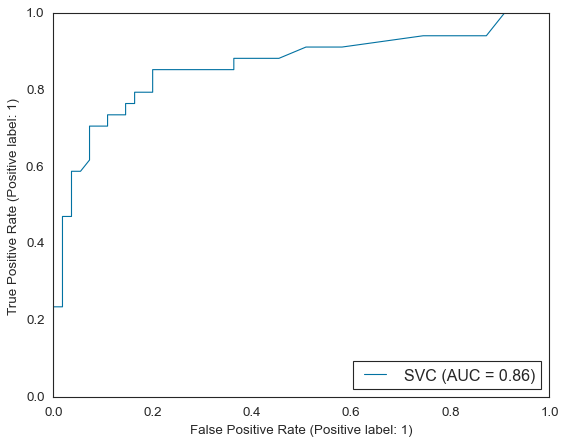

In [272]:
plot_roc_curve(svc_grid_model, x_test, y_test)

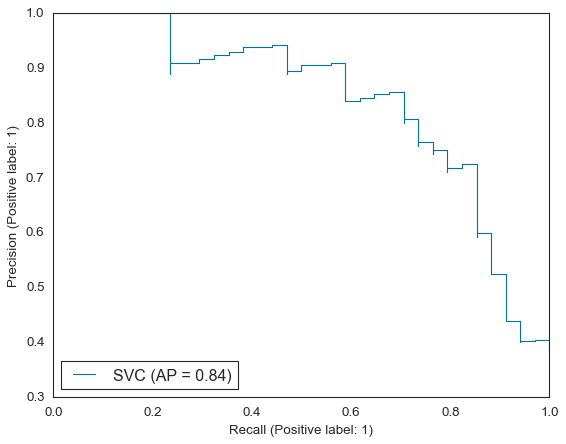

In [273]:
plot_precision_recall_curve(svc_grid_model, x_test, y_test)

### KNN

In [274]:
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")

knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

knns = train_val(y_train, y_pred_train, y_test, y_pred)
knns.rename(columns = {'train_set' : 'knns_train', 'test_set' : 'knns_test'}, inplace = True)
knns

[[47  8]
 [15 19]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        55
           1       0.70      0.56      0.62        34

    accuracy                           0.74        89
   macro avg       0.73      0.71      0.71        89
weighted avg       0.74      0.74      0.73        89



,knns_train,knns_test
Accuracy,0.808989,0.741573
Precision,0.785124,0.703704
Recall,0.693431,0.558824
f1,0.736434,0.622951


### KNN & Best "k"

In [275]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train) 
   
    y_pred = knn_model.predict(x_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

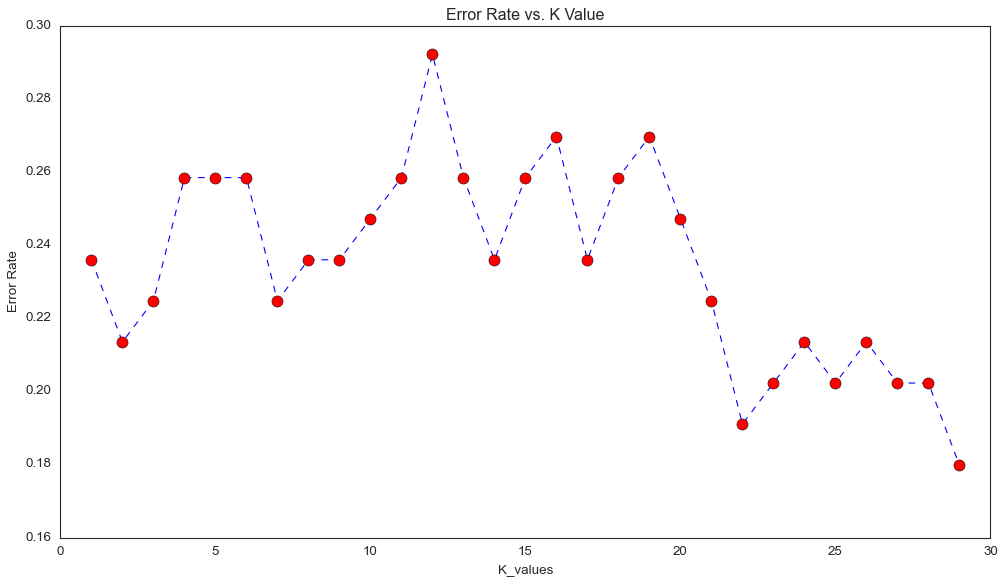

In [276]:
plt.figure(figsize=(15,8))

plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [277]:
knn_model = KNeighborsClassifier(n_neighbors=7, algorithm="kd_tree")

knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_pred_train, y_test, y_pred)

[[46  9]
 [11 23]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        55
           1       0.72      0.68      0.70        34

    accuracy                           0.78        89
   macro avg       0.76      0.76      0.76        89
weighted avg       0.77      0.78      0.77        89



,train_set,test_set
Accuracy,0.808989,0.775281
Precision,0.785124,0.718750
Recall,0.693431,0.676471
f1,0.736434,0.696970


### KNN & CV

In [278]:
knn_cv_model = KNeighborsClassifier(n_neighbors=7, algorithm="kd_tree")
scores = cross_validate(knn_cv_model,
                        x_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                    'recall',
                                    'f1'],
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.797540
test_precision    0.808977
test_recall       0.641758
test_f1           0.709071
dtype: float64

### KNN & GridSearchCV

In [279]:
knn_grid_model = KNeighborsClassifier(n_neighbors=7, algorithm="kd_tree")

In [280]:
param_grid = {"n_neighbors":range(1,30), "p": [1,2], "weights": ['uniform', "distance"]}

In [281]:
knn_grid_model = GridSearchCV(knn_grid_model, param_grid, cv=10, scoring= 'accuracy')

In [282]:
knn_grid_model.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [283]:
knn_grid_model.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [284]:
knn_grid_model = KNeighborsClassifier(n_neighbors=7, algorithm="kd_tree", p=1, weights="uniform")

knn_grid_model.fit(x_train, y_train)

y_pred = knn_grid_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

knnsgrid = train_val(y_train, y_pred_train, y_test, y_pred)
knnsgrid.rename(columns = {'train_set' : 'knnsgrid_train', 'test_set' : 'knnsgrid_test'}, inplace = True)
knnsgrid

[[47  8]
 [12 22]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        55
           1       0.73      0.65      0.69        34

    accuracy                           0.78        89
   macro avg       0.76      0.75      0.76        89
weighted avg       0.77      0.78      0.77        89



,knnsgrid_train,knnsgrid_test
Accuracy,0.808989,0.775281
Precision,0.785124,0.733333
Recall,0.693431,0.647059
f1,0.736434,0.687500


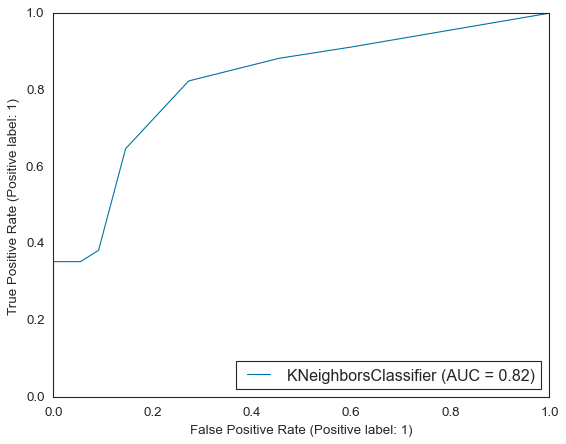

In [285]:
plot_roc_curve(knn_grid_model, x_test, y_test)

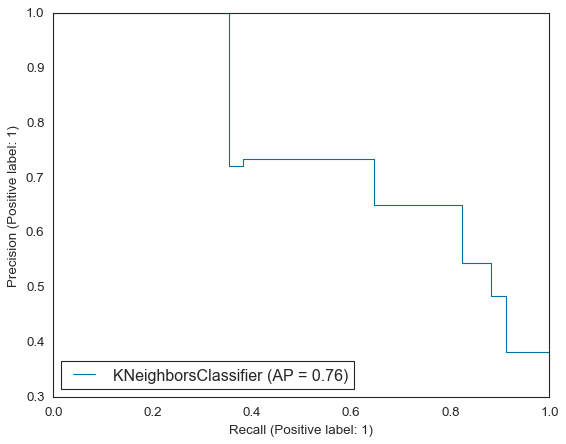

In [286]:
plot_precision_recall_curve(knn_grid_model, x_test, y_test)

### Decision Tree

In [287]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

dts = train_val(y_train, y_pred_train, y_test, y_pred)
dts.rename(columns = {'train_set' : 'dts_train', 'test_set' : 'dts_test'}, inplace = True)
dts

[[47  8]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        55
           1       0.76      0.74      0.75        34

    accuracy                           0.81        89
   macro avg       0.80      0.79      0.80        89
weighted avg       0.81      0.81      0.81        89



,dts_train,dts_test
Accuracy,0.808989,0.808989
Precision,0.785124,0.757576
Recall,0.693431,0.735294
f1,0.736434,0.746269


### Decision Tree & CV

In [288]:
dt_cv_model = DecisionTreeClassifier(max_depth=None, random_state=42)
scores = cross_validate(dt_cv_model,
                        x_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                    'recall',
                                    'f1'],
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.789286
test_precision    0.772043
test_recall       0.670330
test_f1           0.709653
dtype: float64

In [289]:
dt_model.feature_importances_

array([0.2192785 , 0.36172397, 0.02535953, 0.12874515, 0.09541622,
       0.07225834, 0.02451737, 0.07270093])

In [290]:
feature_imp = pd.DataFrame(index=x_train.columns,
                           data=dt_model.feature_importances_,
                           columns=["FeatureImportince"]).sort_values("FeatureImportince", ascending=False)
feature_imp

,FeatureImportince
Sex,0.361724
Pclass,0.219279
Fare,0.128745
Embarked,0.095416
Age*Class,0.072701
Title,0.072258
Age,0.025360
IsAlone,0.024517


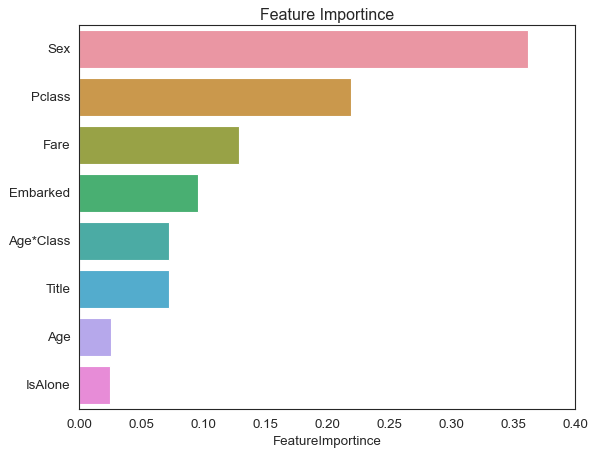

In [291]:
sns.barplot(x=feature_imp.FeatureImportince, y=feature_imp.index)
plt.title("Feature Importince")
plt.tight_layout
plt.show()

### Decision Tree & GridSearchCV

In [292]:
dt_grid_model = DecisionTreeClassifier(random_state=42)

In [293]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [294]:
dt_grid_model = GridSearchCV(dt_grid_model, param_grid, cv=10, scoring= 'recall')

In [295]:
dt_grid_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [296]:
dt_grid_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'best'}

In [297]:
dt_grid_model = DecisionTreeClassifier(max_depth=None,
                                       max_features="auto",
                                       min_samples_leaf=2,
                                       min_samples_split=8,
                                       splitter="best")

dt_grid_model.fit(x_train, y_train)
y_pred = dt_grid_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

dtsgrid = train_val(y_train, y_pred_train, y_test, y_pred)
dtsgrid.rename(columns = {'train_set' : 'dtsgrid_train', 'test_set' : 'dtsgrid_test'}, inplace = True)
dtsgrid

[[45 10]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83        55
           1       0.71      0.74      0.72        34

    accuracy                           0.79        89
   macro avg       0.77      0.78      0.78        89
weighted avg       0.79      0.79      0.79        89



,dtsgrid_train,dtsgrid_test
Accuracy,0.808989,0.786517
Precision,0.785124,0.714286
Recall,0.693431,0.735294
f1,0.736434,0.724638


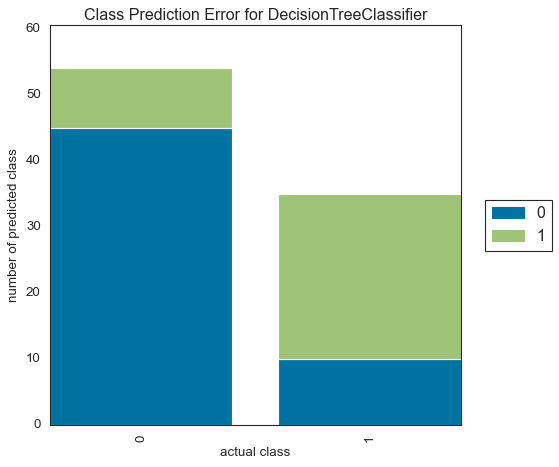

In [298]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_grid_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

### Random Forest

In [299]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

rfs = train_val(y_train, y_pred_train, y_test, y_pred)
rfs.rename(columns = {'train_set' : 'rfs_train', 'test_set' : 'rfs_test'}, inplace = True)
rfs

[[46  9]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        55
           1       0.74      0.74      0.74        34

    accuracy                           0.80        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.80      0.80      0.80        89



,rfs_train,rfs_test
Accuracy,0.808989,0.797753
Precision,0.785124,0.735294
Recall,0.693431,0.735294
f1,0.736434,0.735294


### Random Forest & CV

In [300]:
rf_cv_model = RandomForestClassifier(max_depth=None, random_state=42)
scores = cross_validate(rf_cv_model,
                        x_train,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                    'recall',
                                    'f1'],
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.794921
test_precision    0.773639
test_recall       0.692308
test_f1           0.721255
dtype: float64

### Random Forest & GridSearchCV

In [301]:
rf_grid_model = RandomForestClassifier(class_weight = "balanced", random_state=101)

In [302]:
param_grid = {'n_estimators':[50, 100, 300],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}

In [303]:

rf_grid_model = GridSearchCV(rf_grid_model,
                             param_grid,
                             scoring = "recall",
                             n_jobs = -1,
                             verbose = 2)

In [304]:
rf_grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [2, 3, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 300]},
             scoring='recall', verbose=2)

In [305]:
rf_grid_model.best_params_

{'max_depth': 3,
 'max_features': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [306]:
rf_grid_model = RandomForestClassifier(max_depth=3,
                                       max_features=2,
                                       min_samples_split=8,
                                       n_estimators=100)

rf_grid_model.fit(x_train, y_train)
y_pred = rf_grid_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

rfsgrid = train_val(y_train, y_pred_train, y_test, y_pred)
rfsgrid.rename(columns = {'train_set' : 'rfsgrid_train', 'test_set' : 'rfsgrid_test'}, inplace = True)
rfsgrid

[[49  6]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        55
           1       0.81      0.74      0.77        34

    accuracy                           0.83        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.83      0.83      0.83        89



,rfsgrid_train,rfsgrid_test
Accuracy,0.808989,0.831461
Precision,0.785124,0.806452
Recall,0.693431,0.735294
f1,0.736434,0.769231


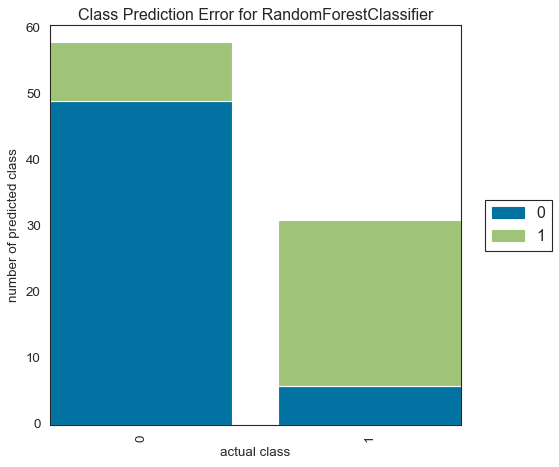

In [307]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_grid_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

In [308]:
rf_model.feature_importances_

array([0.15744623, 0.20176068, 0.05962894, 0.15949891, 0.09949049,
       0.17267543, 0.04964743, 0.09985188])

In [309]:
feature_imp = pd.DataFrame(index=x_train.columns,
                           data=rf_model.feature_importances_,
                           columns=["FeatureImportince"]).sort_values("FeatureImportince", ascending=False)
feature_imp

,FeatureImportince
Sex,0.201761
Title,0.172675
Fare,0.159499
Pclass,0.157446
Age*Class,0.099852
Embarked,0.099490
Age,0.059629
IsAlone,0.049647


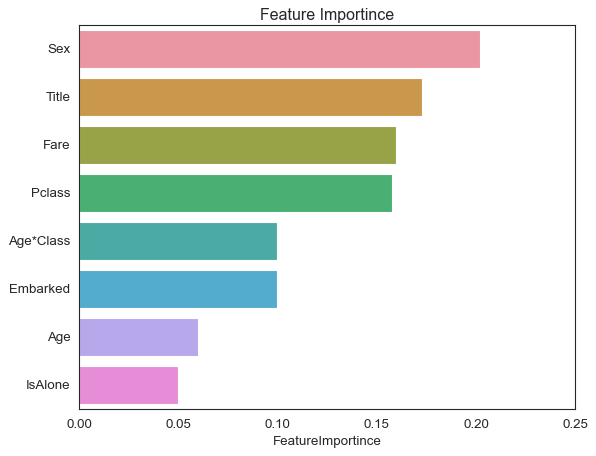

In [310]:
sns.barplot(x=feature_imp.FeatureImportince, y=feature_imp.index)
plt.title("Feature Importince")
plt.tight_layout
plt.show()

### All Model Metrics

In [328]:
all_metrics = pd.concat([ls, lsgrid, svcs, svcsgrid, knns, knnsgrid, dts, dtsgrid, rfs, rfsgrid], axis=1)
all_metrics

,ls_train,ls_test,lsgrid_train,lsgrid_test,svcs_train,svcs_test,svcsgrid_train,svcsgrid_test,knns_train,knns_test,knnsgrid_train,knnsgrid_test,dts_train,dts_test,dtsgrid_train,dtsgrid_test,rfs_train,rfs_test,rfsgrid_train,rfsgrid_test
Accuracy,0.823034,0.831461,0.808989,0.842697,0.808989,0.831461,0.808989,0.831461,0.808989,0.741573,0.808989,0.775281,0.808989,0.808989,0.808989,0.786517,0.808989,0.797753,0.808989,0.831461
Precision,0.793651,0.771429,0.785124,0.794118,0.785124,0.771429,0.785124,0.827586,0.785124,0.703704,0.785124,0.733333,0.785124,0.757576,0.785124,0.714286,0.785124,0.735294,0.785124,0.806452
Recall,0.729927,0.794118,0.693431,0.794118,0.693431,0.794118,0.693431,0.705882,0.693431,0.558824,0.693431,0.647059,0.693431,0.735294,0.693431,0.735294,0.693431,0.735294,0.693431,0.735294
f1,0.760456,0.782609,0.736434,0.794118,0.736434,0.782609,0.736434,0.761905,0.736434,0.622951,0.736434,0.687500,0.736434,0.746269,0.736434,0.724638,0.736434,0.735294,0.736434,0.769231


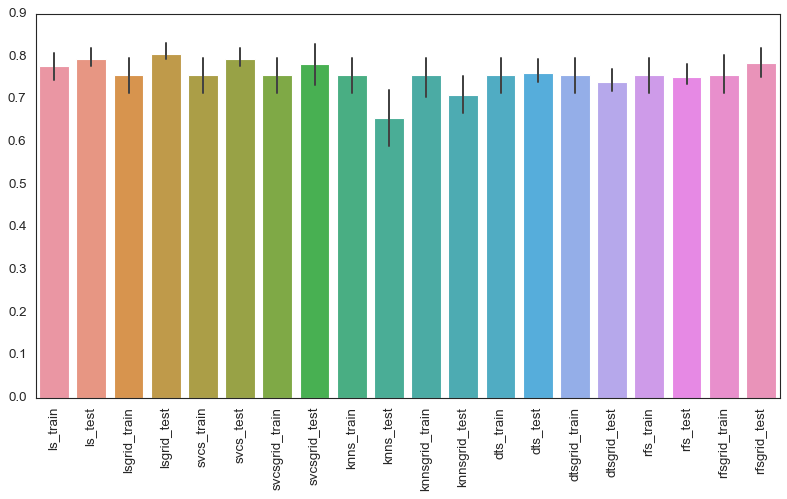

In [329]:
plt.figure(figsize=(12,6))
sns.barplot(data=all_metrics)
plt.xticks(rotation = 90);